In [1]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [2]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [3]:
# Import scikit-Learn module for the algorithm/modeL: Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

In [4]:
# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

In [5]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [6]:
# Import scikit-Learn module classification report to later use for information about how the system try to classify / lable each record
from sklearn.metrics import classification_report

# Load the data

In [7]:
#Specify location of the dataset
filename = 'C:/Users/miriamgarcia/Downloads/housing_boston_w_hdrs.csv'
df = pd.read_csv(filename)
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
447  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
448  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
449  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
450  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
451  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

# Preprocess Dataset

In [8]:
df = df.drop("ZN",1)
df = df.drop("CHAS",1)

In [9]:
# count the number of NaN values in each
print(df.isnull().sum())

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# Perform the exploratory data analysis (EDA) on the dataset

In [10]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print(df.shape)

(452, 12)


In [11]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

CRIM       float64
INDUS      float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [12]:
#return the first five records / rows of the data set
print(df.head(5))

      CRIM  INDUS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO       B  \
0  0.00632   2.31  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   
1  0.02731   7.07  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   
2  0.02729   7.07  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   
3  0.03237   2.18  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   
4  0.06905   2.18  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [13]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

             CRIM       INDUS         NOX          RM         AGE         DIS  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   10.304889    0.540816    6.343538   65.557965    4.043570   
std      2.495894    6.797103    0.113816    0.666808   28.127025    2.090492   
min      0.006320    0.460000    0.385000    3.561000    2.900000    1.129600   
25%      0.069875    4.930000    0.447000    5.926750   40.950000    2.354750   
50%      0.191030    8.140000    0.519000    6.229000   71.800000    3.550400   
75%      1.211460   18.100000    0.605000    6.635000   91.625000    5.401100   
max      9.966540   27.740000    0.871000    8.780000  100.000000   12.126500   

              RAD         TAX     PTRATIO           B       LSTAT        MEDV  
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000  
mean     7.823009  377.442478   18.247124  369.826504   11.441881   23.750442  
std      7.543494  151.327573 

In [14]:
#class distribution i.e. how many records are in each class
print(df.groupby('MEDV').size())

MEDV
6.3      1
7.0      1
8.1      1
8.5      1
9.5      1
        ..
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Length: 210, dtype: int64


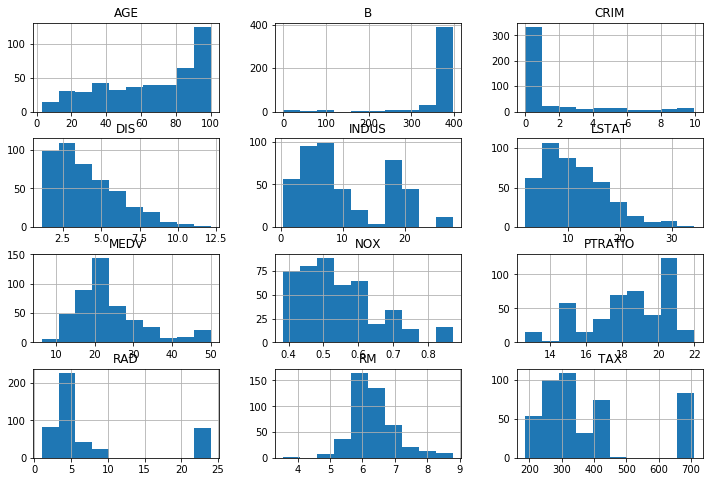

In [15]:
df.hist(figsize=(12, 8))
pyplot.show()

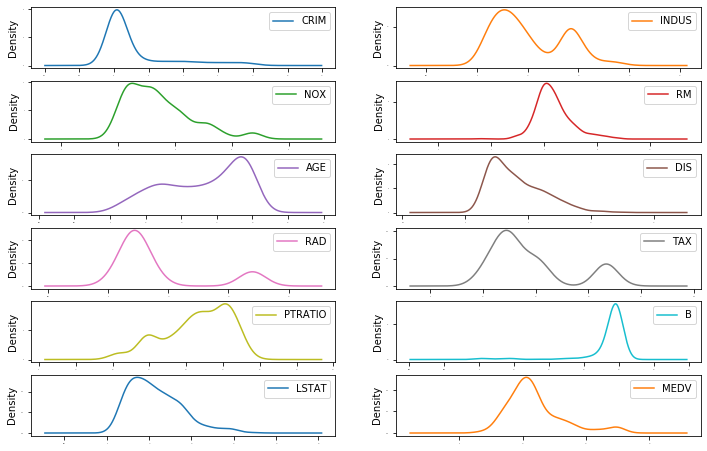

In [16]:
# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(12, 2), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

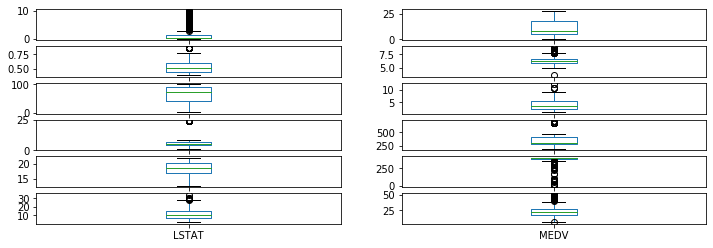

In [17]:
# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(12,2), sharex=False, figsize=(12,8))
pyplot.show()

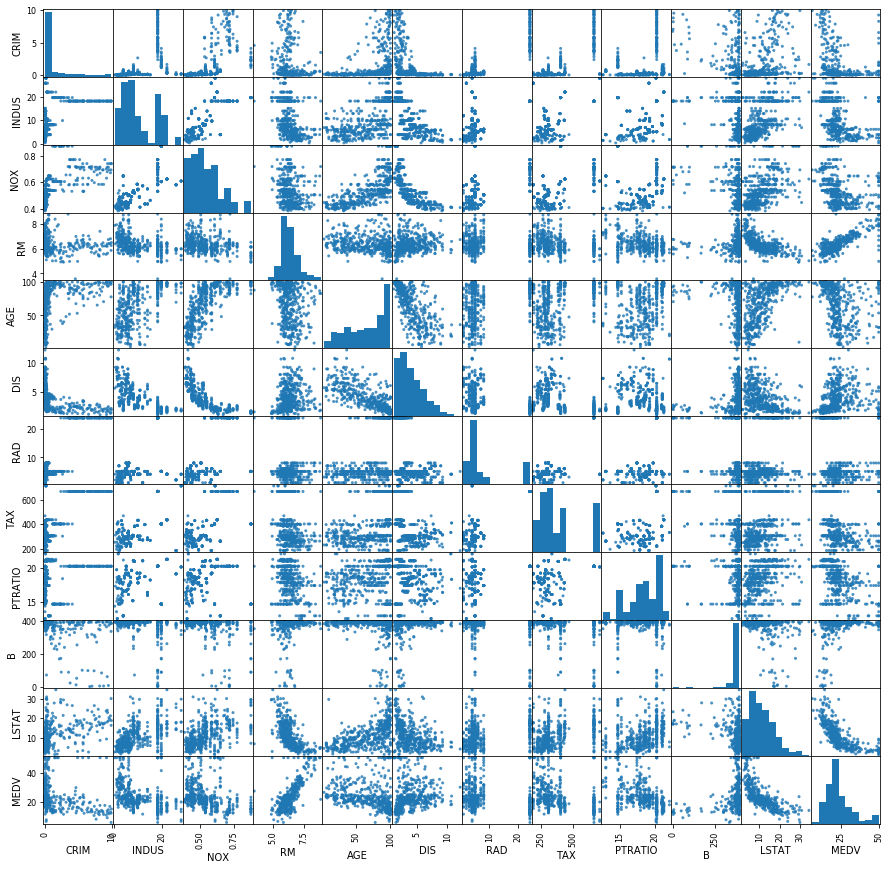

In [57]:
# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

# Separate Dataset into Input & Output NumPy arrays

In [19]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 4 (5 - 1)
# these are the independent variables or predictors
X = array[:,0:11]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,11]

# Split Input/Output Arrays into Training/Testing Datasets

In [20]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 4
#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
print(Y_train)

[22.7 24.7 30.7 26.4 30.1 20.3 25.  46.  43.1 43.5 23.6 19.1 18.8 14.9
 20.1 23.1 18.5 20.  42.8 32.9 20.1 20.  19.2 31.  21.1 33.2 37.6 32.7
 19.8 42.3 50.  23.8 21.7 17.1 23.1 16.8 17.2 22.  28.4 36.1 23.3 21.4
 21.9 26.5 11.5 22.2 30.8 18.4 23.1 17.5 21.9 21.7 23.8 13.6 20.5 48.8
 28.2 24.8 11.8 29.1 23.8 15.1 17.4 11.  19.   8.5 24.8 20.9 25.2 19.4
 30.1 20.7 19.9 29.  28.5 18.7 28.6 37.9 19.1 14.1 19.4 32.  29.6 17.7
 23.  22.8 24.6 50.  22.  20.2  7.  31.5 22.9 18.2 22.4 19.2 31.2 14.4
 50.  16.1 23.7 14.6 23.5 21.7 23.2 24.1 21.2 21.  24.  20.6 24.3 20.1
 22.8 13.3 24.8 21.  20.4 48.3 14.5 36.  22.6 18.4 18.9 15.2 14.9  8.1
 29.9 23.9 31.6 13.1 20.3 16.6 22.2 13.6 36.2 20.8 12.6 50.  18.1 21.5
 18.5 15.6 26.2 32.2 16.1 31.6 23.1 34.7 20.  21.  28.7 23.9 35.4 13.2
 18.3 13.1 22.2 19.8 17.1 17.8 24.1 30.1 20.3 15.6 26.6 15.  37.2 27.1
 24.4 17.8 20.6 37.3 26.6 19.9 19.6 38.7 25.  20.6 22.8 16.2 20.3 24.3
 14.9 19.3 25.  14.4 19.9 16.2 22.5 19.1 17.8 14.8 35.2 29.  25.1 21.5
 12.5 

# Build and Train the Model

In [21]:
#build the model
model = DecisionTreeRegressor()
# train the model using the training sub-dataset
model.fit(X_train, Y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

# Prediction 1

In [22]:
# The suburb area has the following predictors:
#CRIM:1.32
#INDUS :10.34
#NOX:0.52
#RM: 6.0
#AGE: proportion of owner-occupied units built prior to 1940 = 60
#DIS: weighted distances to five Boston employment centers = 3.5
#RAD: index of accessibility to radial highways = 5.0
#TAX: 275    
#PTRATIO: pupil-teacher ratio by town = 16
#B:330
#LSTAT:9.0

model.predict([[1.32, 10.34, 0.52, 6, 60,3.5,5,275,16,330,9]])

array([25.])

So, the model predict that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around 25,000.

# Evaluate/Validate Algorithm/Model • Using K-Fold Cross-Validation

In [23]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 4
# Split the whole data set into folds
kfold = KFold(n_splits=num_folds, random_state=seed)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-foLd cross-validation
print(results.mean())

-42.99801690821256


After we train we evaluate
Use K-Fold to determine if the model is acceptable
We pass the whole set because the system will divide for us
-42.99 avg of all error (mean of square errors) this value would traditionally be positive value, but scikit reports shows it as negative . Square root of this value is around 6.3 to 6.6

# Prediction 2

In [24]:
# The suburb area has the following predictors:
#CRIM:0.6
#INDUS :17.35
#NOX:0.75
#RM: 4.0
#AGE: proportion of owner-occupied units built prior to 1940 = 25
#DIS: weighted distances to five Boston employment centers = 8.5
#RAD: index of accessibility to radial highways = 3.0
#TAX: 400    
#PTRATIO: pupil-teacher ratio by town = 18
#B:340
#LSTAT:12.00

model.predict([[0.6, 17.35, 0.75, 4.0, 25,8.5,3.0,400,18,340,12]])

array([17.1])

So, the model predict that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around 15,300.

# Evaluate/Validate Algorithm/Model • Using K-Fold Cross-Validation

In [26]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 4
# Split the whole data set into folds
kfold = KFold(n_splits=num_folds, random_state=seed)
# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-foLd cross-validation
print(results.mean())

-39.0334845410628


After we train we evaluate
Use K-Fold to determine if the model is acceptable
We pass the whole set because the system will divide for us
-39.03 avg of all error (mean of square errors) this value would traditionally be positive value, but scikit reports shows it as negative . The Sqaure root of this value would be around 6 to 6.5 (6.240)

### Calculate R square value 

In [27]:
R_squared = model.score(X_test, Y_test)
print(R_squared)

0.7445252326750191
